    
   Zomato Pune Restaurants Dataset consists of information like the name, address, location, rate, votes, approx cost(for two), 
cuisines,reviews and etc about the different restaurants in Pune.

   Restaurants have become one of the most important parts of our daily routine whether it is casual dining or visit a club. 
Below is the data visualization of zomato restaurant in Pune.

   I will  analyze the distribution of ratings, explore popular cuisines, identify top-rated restaurants, visualize the distribution of restaurants across different areas of Pune, etc.
    
   Problem-solving: While analyzing the data, I have encountered specific problems or questions that require solving which 
includes identifying factors influencing ratings, understanding customer preferences, recommending restaurants based on 
specific criteria, etc. For such problems, I applied data analysis techniques, machine learning algorithms, or statistical models to derive insights and make informed decisions

In [1]:
# Impoerting required liabraries

import pandas as pd
import math
import numpy as np
from sklearn.model_selection import KFold
%matplotlib inline
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
on=OneHotEncoder

In [2]:
# to show the version
print(pd.__version__)


1.5.3


In [3]:
# using the warnings module in Python to ignore specific types of warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [4]:
# Lets load the data file and read it
data_file=r'zomato_pune_V002.csv'
df = pd.read_csv('zomato_pune_V002.csv')


### Exploratory Data Analysis (EDA)

I will create a duplicate of the data file to have a backup or a reference in case any data gets deleted 
or misplaced. 
 Lets analyse the mean, unique and counts and  other information related data.

In [5]:
df_1=df.copy()

In [6]:
df.shape

(12189, 104)

Data file contains 12189 Rows and 104 Columns

In [7]:
df.head(8)

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0
5,Flechazo,https://www.zomato.com/pune/flechazo-wakad,Wakad,"Bar, Casual Dining",4.6,4731 votes,+91 8095311112,"Asian, Mediterranean, North Indian","₹1,400",Cash and Cards accepted,...,1,0,0,0,1,0,0,0,0,597.0
6,Barbeque Nation - Sayaji Hotel,https://www.zomato.com/pune/barbeque-nation-sa...,Wakad,Casual Dining,4.5,2999 votes,18001086060,"North Indian, Mughlai, Salad, Kebab, BBQ","₹1,700",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,192.0
7,BeHive,https://www.zomato.com/pune/behive-hinjawadi,Hinjawadi,"Pub, Casual Dining",4.0,1437 votes,+91 9150018777 +91 9175680461,"North Indian, Chinese, Continental","₹1,400",Cash and Cards accepted,...,0,0,0,0,0,0,0,0,0,72.0


Lets check count, mean, min, max and other information of the provided data file.

In [8]:
df.describe()

,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,Gaming Are,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
count,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.00000,...,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000,12189.000000
mean,0.000246,0.005005,0.001559,0.322504,0.000164,0.001641,0.145541,0.003200,0.001067,0.00041,...,0.048486,0.002543,0.001887,0.247846,0.005743,0.001641,0.000574,0.029863,0.000164,4.943966
std,0.015687,0.070568,0.039452,0.467454,0.012809,0.040475,0.352660,0.056477,0.032642,0.02025,...,0.214800,0.050369,0.043400,0.431780,0.075567,0.040475,0.023958,0.170216,0.012809,28.865265
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1539.000000


In [9]:
df.dtypes

Restaurant_Name       object
Web_Link              object
Locality              object
Sponsored             object
Ratings_out_of_5      object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 104, dtype: object

Lets check for null values

In [10]:
df.isnull().sum()

Restaurant_Name      0
Web_Link             0
Locality             0
Sponsored            0
Ratings_out_of_5     0
                    ..
Disabled Friendly    0
Serves Halal         0
Takeaway Only        0
BYOB Only            0
spam_review          0
Length: 104, dtype: int64

In [11]:
# Now check the duplicate values and delete them
df.duplicated().sum()

55

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12134 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


##### Examine: Charges_for_two

In [15]:
df['Charges_for_two']

0             ₹1,400
1             ₹1,500
2             ₹2,500
3             ₹1,400
4             ₹1,500
            ...     
12184    Not Present
12185    Not Present
12186           ₹300
12187         ₹1,200
12188           ₹200
Name: Charges_for_two, Length: 12134, dtype: object

In [16]:
df['Charges_for_two'].value_counts()

Not Present    2108
₹300           1427
₹400           1230
₹200           1089
₹500           1066
               ... 
₹4,200            1
₹1,350            1
₹2,700            1
₹3,200            1
₹3,500            1
Name: Charges_for_two, Length: 63, dtype: int64

In [17]:
# Replace 'not present' with NaN in the 'Charges_for_two' column
df['Charges_for_two'] = df['Charges_for_two'].replace('Not Present', np.nan)


In [18]:
#remove special character "₹" from Charges_for_two Column:
df['Charges_for_two'] = df['Charges_for_two'].str.replace('₹', '')
#remove (',') from Charges_for_two column:
df['Charges_for_two'] = df['Charges_for_two'].str.replace(',', '')

In [19]:
pd.DataFrame(df['Charges_for_two'])

,Charges_for_two
0,1400
1,1500
2,2500
3,1400
4,1500
...,...
12184,NaN
12185,NaN
12186,300
12187,1200


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12134 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int64(86), object(17)
memory usage: 9.7+ MB


##### Data Visualization

Now its time to explore the data and relation between the desired columns

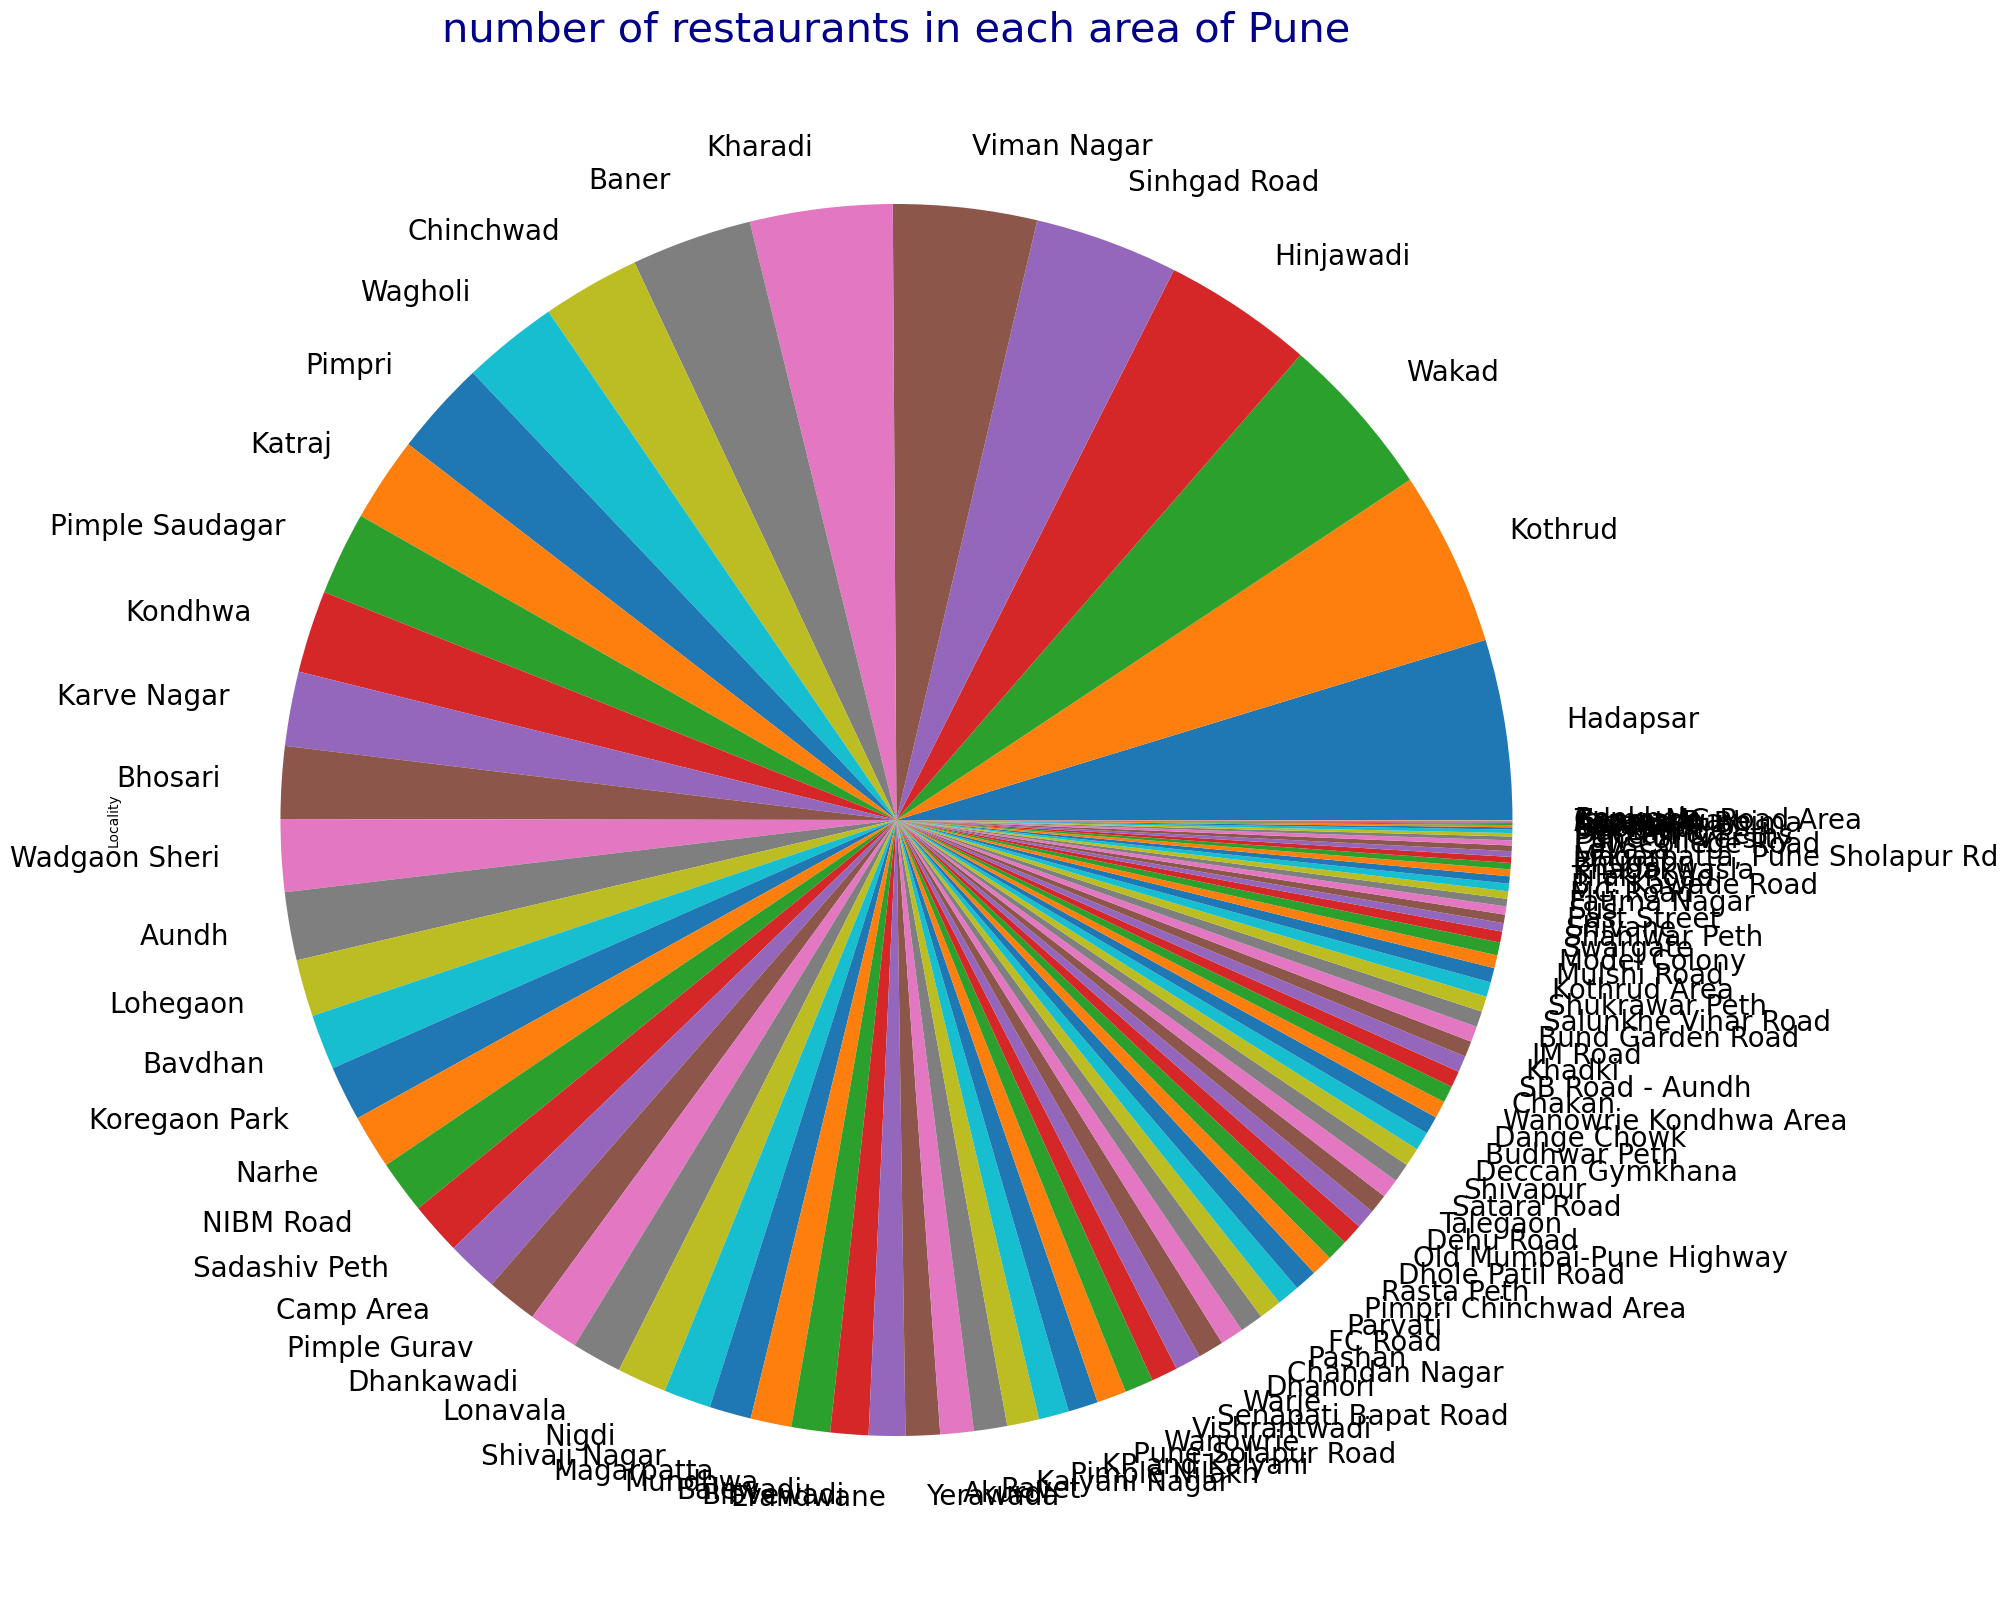

In [21]:
# we will check no of reatsurants in each area
plt.figure(figsize=(20,20))

ax=df.Locality.value_counts()
ax.plot(kind='pie',fontsize=20)

plt.title('number of restaurants in each area of Pune',fontsize=30,color='darkblue')
plt.show()

Now check the number of restaurants in each locality

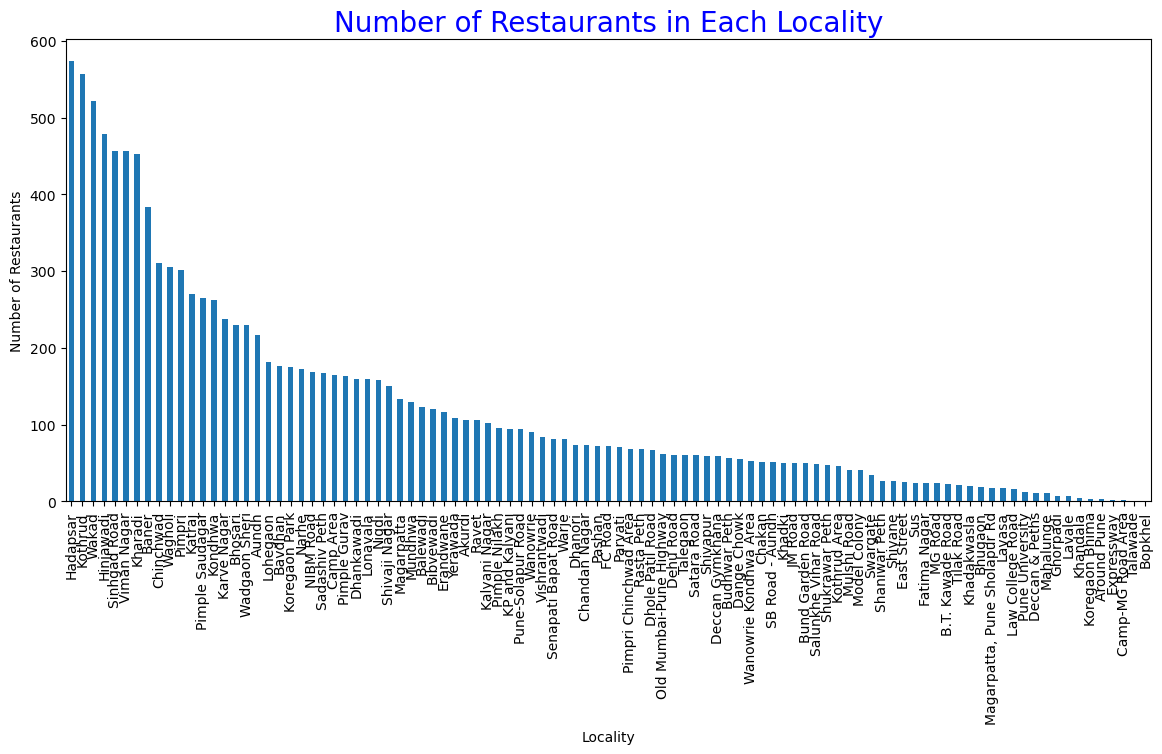

In [22]:

locality_counts = df['Locality'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(14, 6))
locality_counts.plot(kind='bar')
plt.xlabel('Locality')
plt.ylabel('Number of Restaurants')
plt.title('Number of Restaurants in Each Locality',fontsize=20,color='blue')
plt.xticks(rotation=90)
plt.show()


In Above plot, we can clearly see there are max restaurants in Hadapsar area and min in BOpkhle area

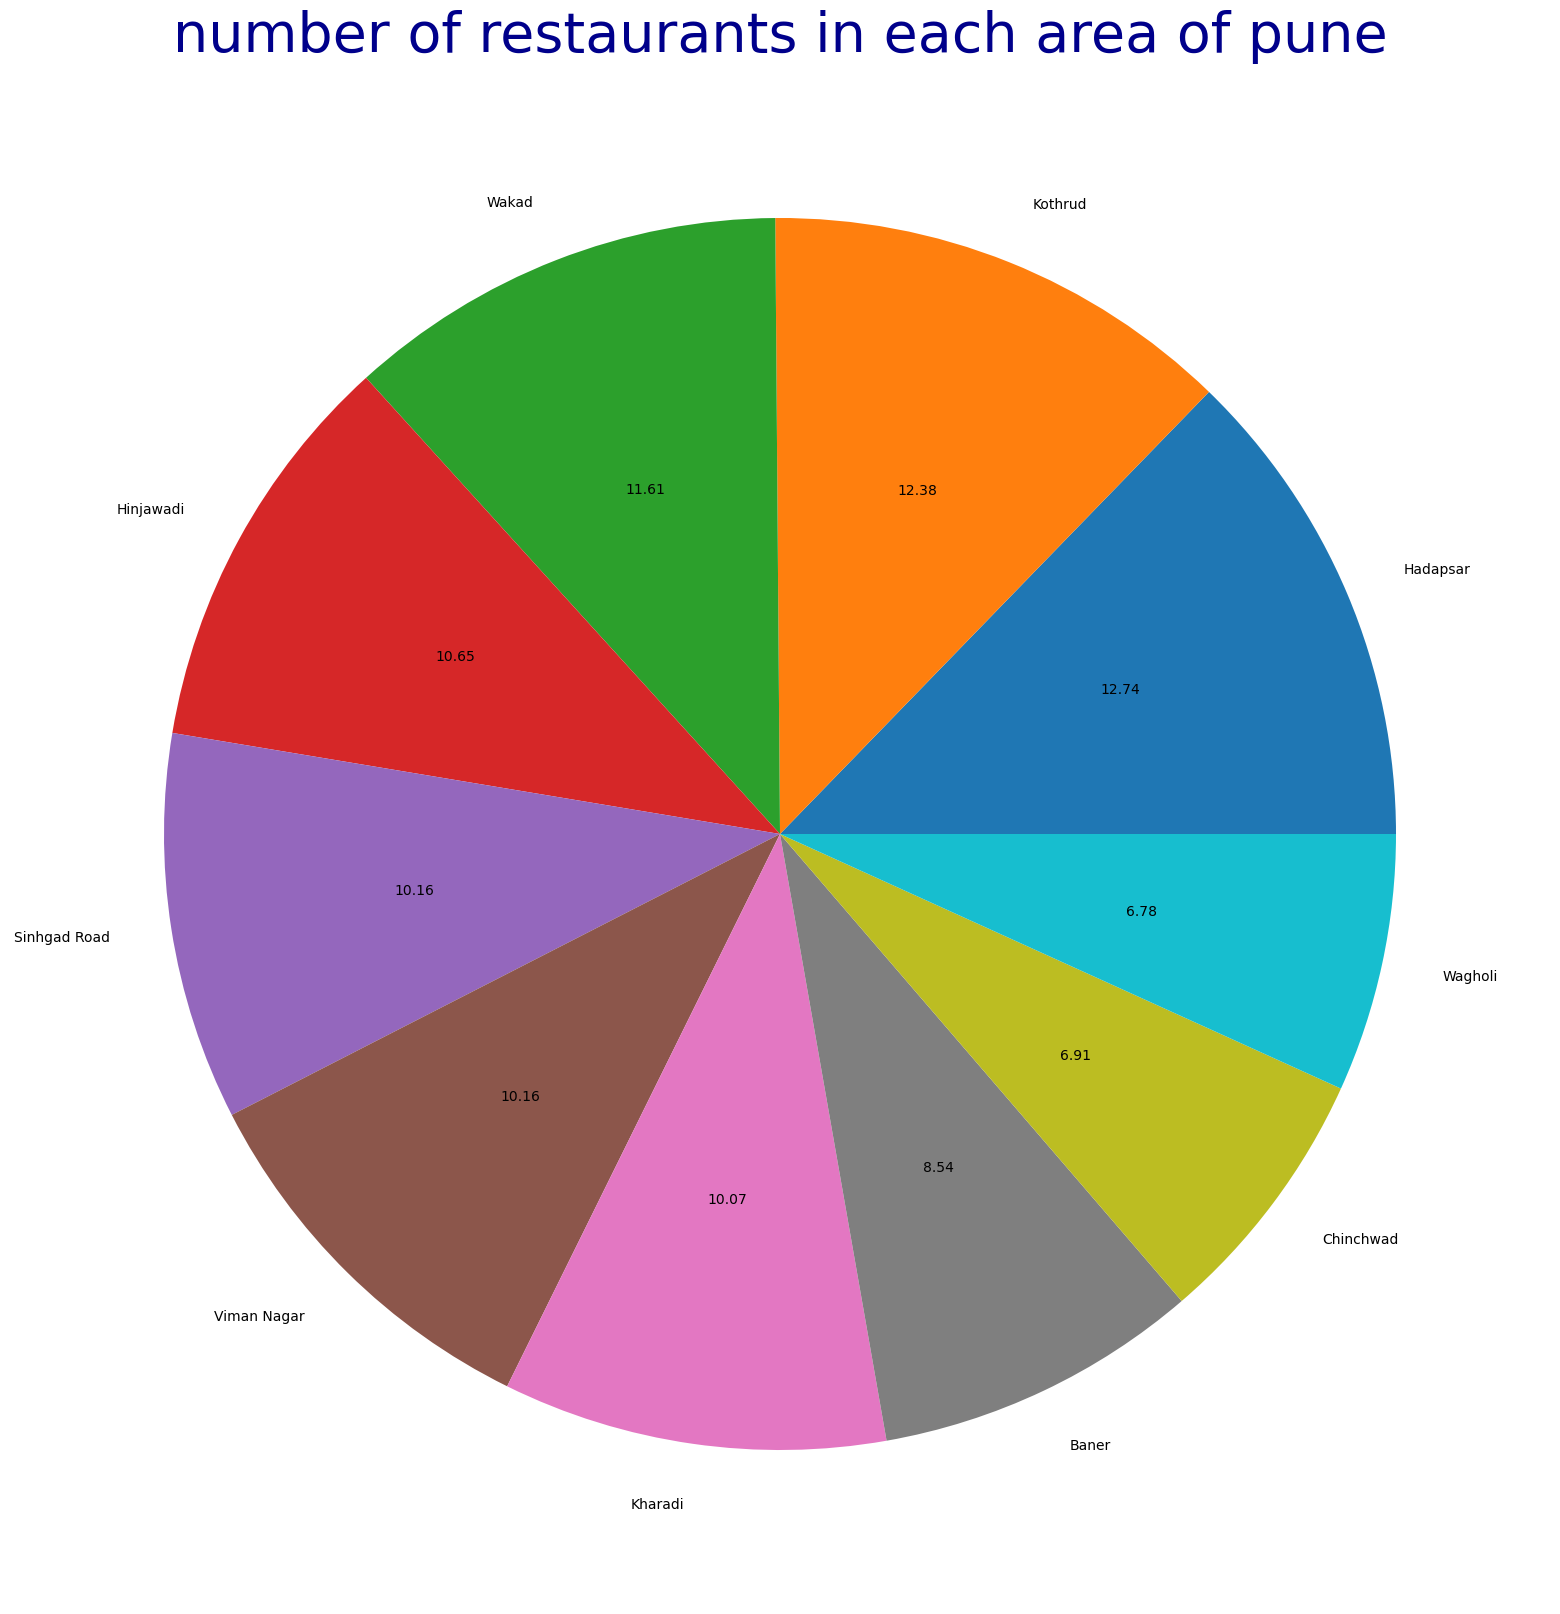

In [23]:
# Lets check no of each resturants in wch area in pune
plt.figure(figsize=(20,20))

ax=df.Locality.value_counts()[:10]
labels=df['Locality'].value_counts()[:10].index
plt.pie(ax,labels=labels,autopct='%.2f')
plt.title('number of restaurants in each area of pune',fontsize=40,color='darkblue')
plt.show()

<Axes: >

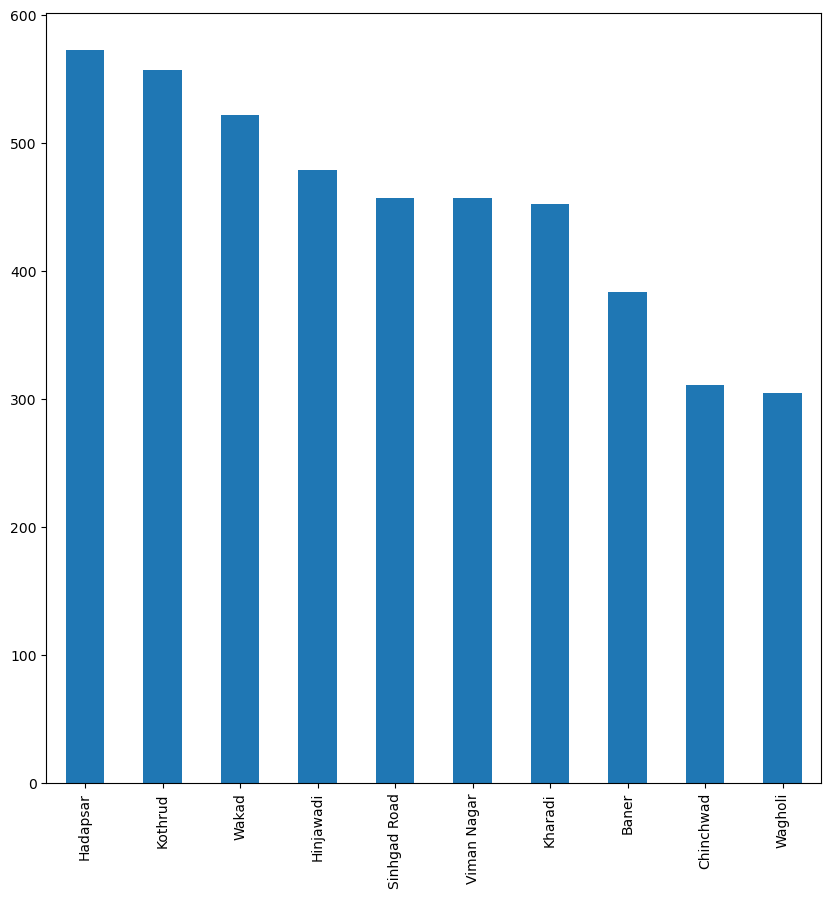

In [24]:
# top 10 restaurants
plt.figure(figsize=(10,10))
ax=df.Locality.value_counts()[:10]
ax.plot(kind='bar')

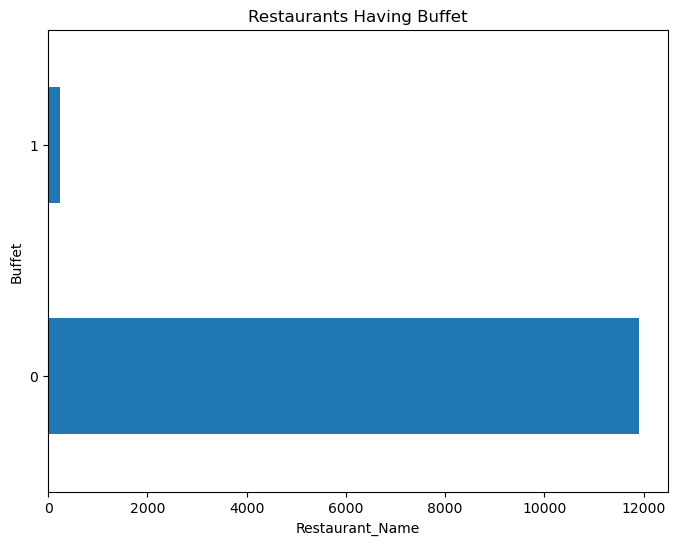

In [25]:
# Count the number of restaurants for each rating
# we will check if the resaturants have Buffet Option
free_parking_counts = df['Buffet'].value_counts()

# Plotting the horizontal bar plot
plt.figure(figsize=(8, 6))
free_parking_counts.plot(kind='barh')
plt.xlabel('Restaurant_Name')
plt.ylabel('Buffet')
plt.title('Restaurants Having Buffet')
plt.show()


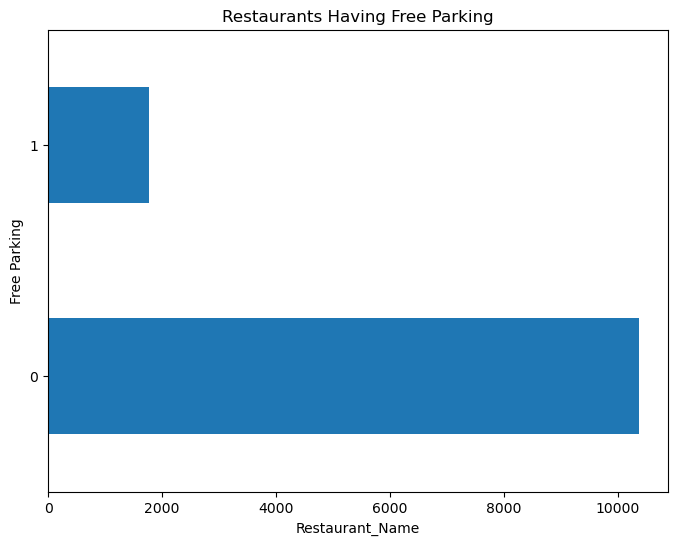

In [26]:
# Count the number of restaurants for each rating
# we will check if the resaturants have 
free_parking_counts = df['Free Parking'].value_counts()

# Plotting the horizontal bar plot
plt.figure(figsize=(8, 6))
free_parking_counts.plot(kind='barh')
plt.xlabel('Restaurant_Name')
plt.ylabel('Free Parking')
plt.title('Restaurants Having Free Parking')
plt.show()

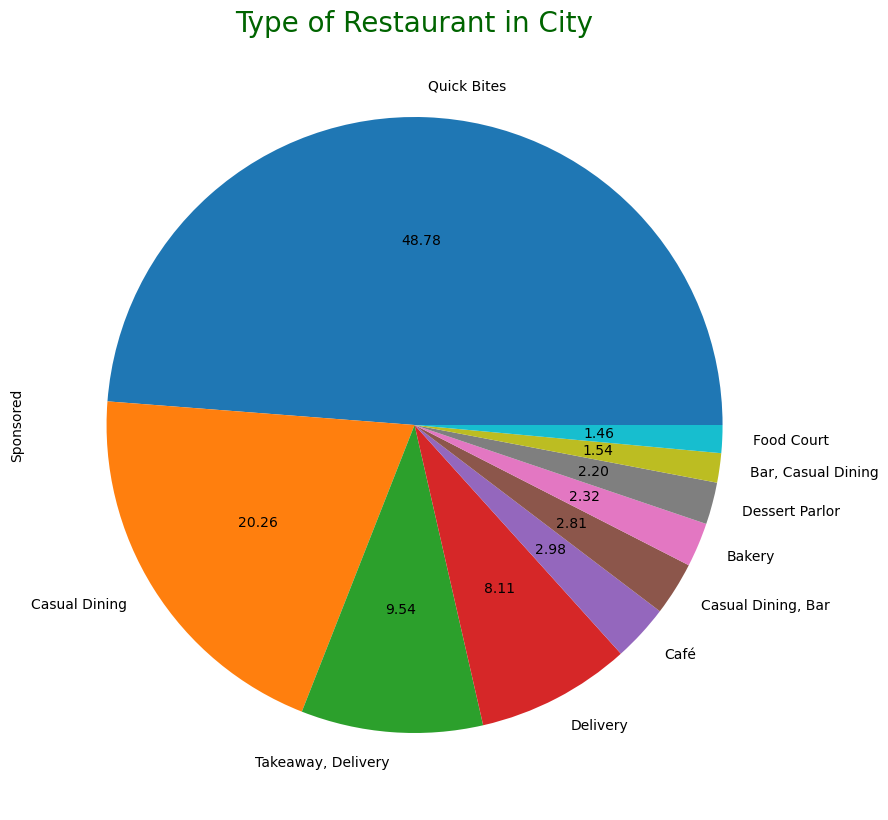

In [27]:
# check type of restaurants in Pune Area
plt.figure(figsize=(10,10))

ax=df.Sponsored.value_counts()[:10]
label=df['Sponsored'].value_counts()[:10].index
ax.plot(kind='pie',labels=label,autopct='%.2f')

plt.title("Type of Restaurant in City",fontsize=20,color='darkgreen')
plt.show()

Above we can see maximum restaurants are affering Quick Bytes

Now we will check the Ratings out of 5 

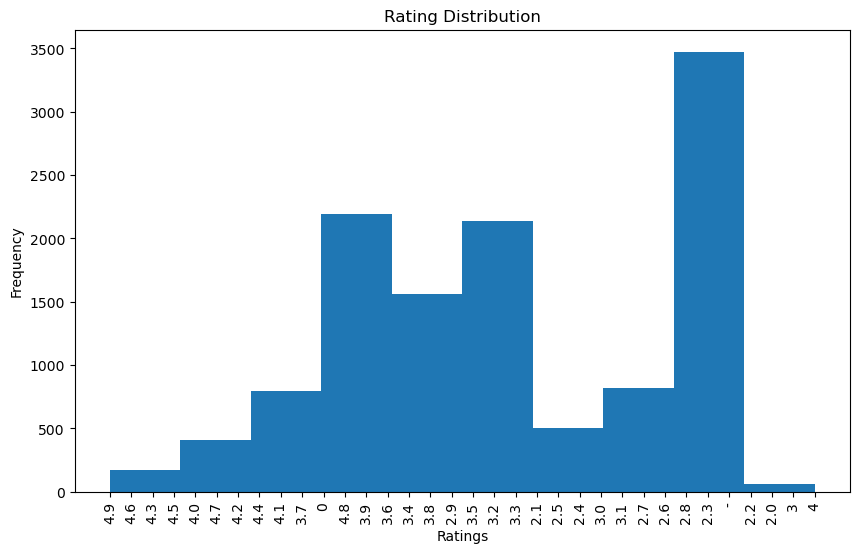

In [28]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram
plt.hist(df['Ratings_out_of_5'], bins=10)

# Customize the plot
plt.title('Rating Distribution')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.xticks(rotation=90)

# Display the plot
plt.show()

Lets check the Charges for two persons

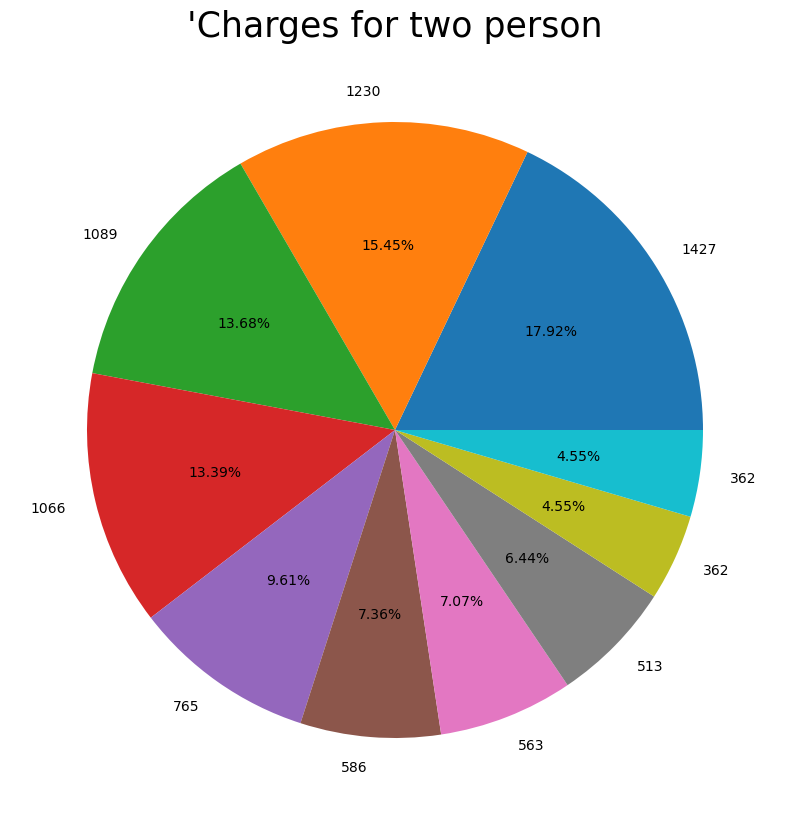

In [29]:
# Pie chart for ' Charges for two'
plt.figure(figsize=(10,10))

ax=df.Charges_for_two.value_counts().head(10)
label=df['Charges_for_two'].value_counts().head(10)

plt.pie(ax,labels=label,autopct='%.2f%%')

plt.title("'Charges for two person",fontsize=25)
plt.show()

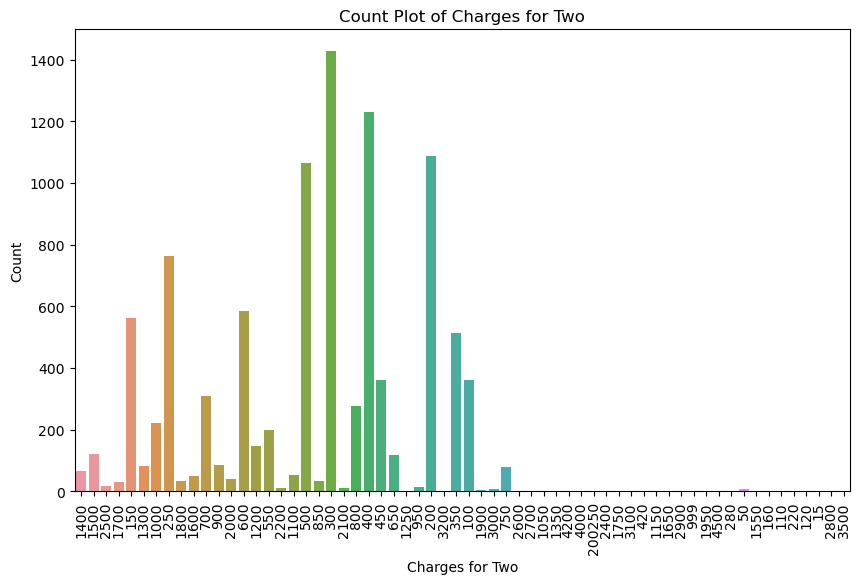

In [30]:
# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Charges_for_two')

# Customize the plot
plt.title('Count Plot of Charges for Two')
plt.xlabel('Charges for Two')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

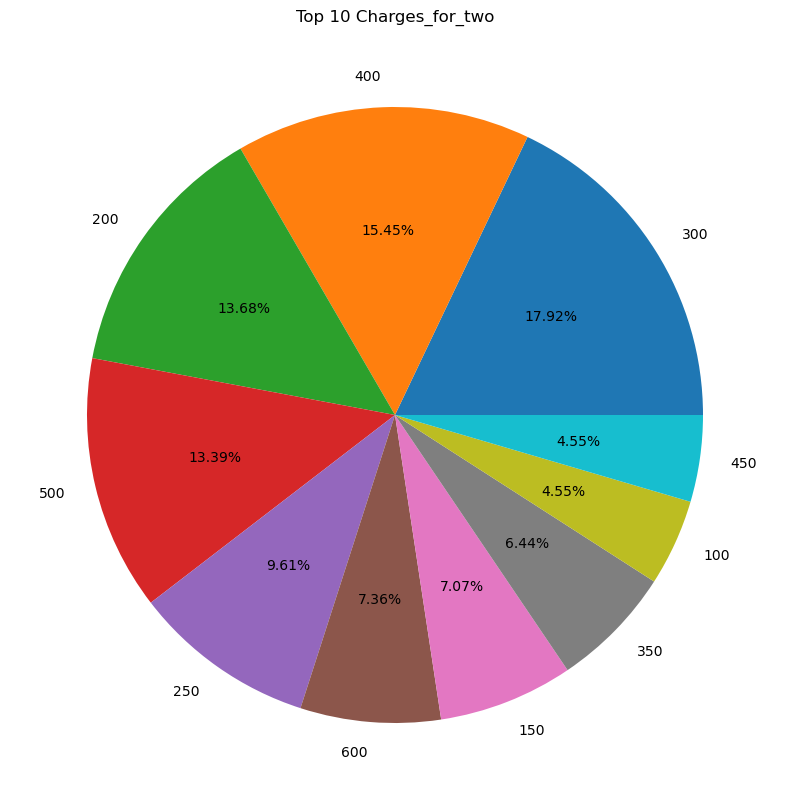

In [31]:
# Get the top 10 value counts and their charges
top_10_charges = df['Charges_for_two'].value_counts().head(10)
charges = top_10_charges.index
counts = top_10_charges.values

# Plotting the pie chart
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=charges, autopct='%.2f%%')
plt.title('Top 10 Charges_for_two')
plt.show()

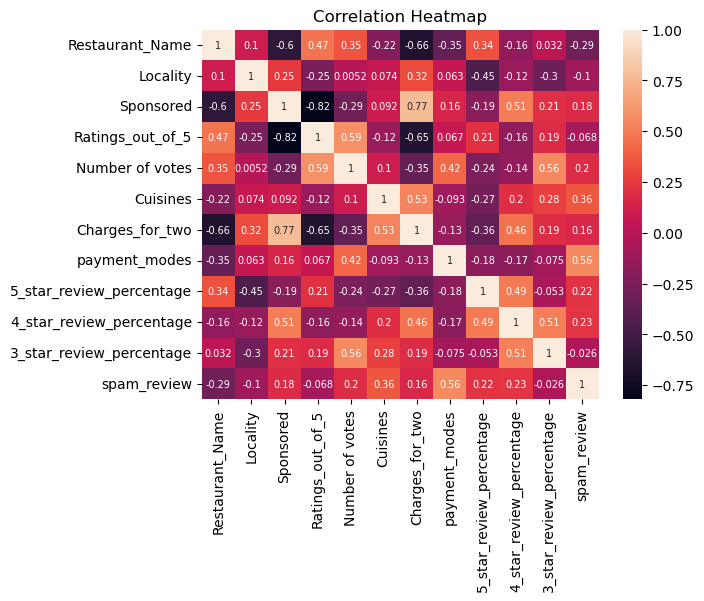

<Figure size 1800x1600 with 0 Axes>

In [32]:
# Create a 2D array or DataFrame for the heatmap data

data = pd.DataFrame({
    "Restaurant_Name": np.random.rand(10),
    "Locality": np.random.rand(10),
    "Sponsored": np.random.rand(10),
    "Ratings_out_of_5": np.random.rand(10),
    "Number of votes" :  np.random.rand(10),
    "Cuisines" : np.random.rand(10),
    "Charges_for_two" : np.random.rand(10),
    "payment_modes" : np.random.rand(10),
    "5_star_review_percentage" : np.random.rand(10),
    "4_star_review_percentage" : np.random.rand(10),
    "3_star_review_percentage" : np.random.rand(10),
    "spam_review" : np.random.rand(10),
    
      
})

# Create a correlation matrix
corr_matrix = data.corr()

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 7})

# Add title and adjust the figure size (optional)
plt.title("Correlation Heatmap")
plt.figure(figsize=(18, 16))


# Display the heatmap
plt.show()

Above heatmap shows maximum corelation betwenn the columns, i e between spam review and Restaurant_name is 0.82, we can delete one feature ' Restaurant_Name'

In [33]:
# Tried to find out max corelation through codes
# Find the maximum correlation value and corresponding columns
max_corr_value = corr_matrix.max().max()
max_corr_columns = corr_matrix.unstack().idxmax()
print("Maximum correlation value:", max_corr_value)
print("Columns with maximum correlation:", max_corr_columns)


Maximum correlation value: 1.0
Columns with maximum correlation: ('Restaurant_Name', 'Restaurant_Name')


In [34]:
df.dtypes

Restaurant_Name       object
Web_Link              object
Locality              object
Sponsored             object
Ratings_out_of_5      object
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 104, dtype: object

##### Data Preparation:

As  it is too much big data, we will Delete unnecessary columns

In [35]:
#Drop Some Columns:

del df['Rest_timming']
del df['Number of votes']
del df['Restaurant_Name']
del df['Phone_number']
del df['Web_Link']
del df['Detail_address']
del df['5_star_review_percentage']
del df['4_star_review_percentage']
del df['3_star_review_percentage']
del df['2_star_review_percentage']
del df['1_star_review_percentage']

df.head()


,Locality,Sponsored,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,Hinjawadi,Casual Dining,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1539.0
1,Bhugaon,"Lounge, Casual Dining",4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,...,1,0,0,0,0,0,0,0,0,139.0
2,Senapati Bapat Road,Fine Dining,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,...,1,0,0,0,0,0,0,0,0,119.0
3,Hinjawadi,"Casual Dining, Bar",4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,...,1,0,0,0,0,0,0,0,0,8.0
4,Shivaji Nagar,"Bar, Casual Dining",4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [36]:
df.shape

(12134, 93)

We will check if there are any special characters, strings are presnet in column and delete them

In [38]:
pd.DataFrame(df['Locality'].value_counts())

,Locality
Hadapsar,573
Kothrud,557
Wakad,522
Hinjawadi,479
Sinhgad Road,457
...,...
Around Pune,3
Expressway,2
Camp-MG Road Area,2
Talawade,1


In [39]:
# Clean and standardize the "Locality" column
df['Locality'] = df['Locality'].str.strip()  # Remove leading/trailing spaces, ensures that any extra whitespace is eliminated.
df['Locality'] = df['Locality'].str.capitalize()  # Convert to capital case,helps standardize the format of the locality names.

In [40]:
df['Locality']

0                  Hinjawadi
1                    Bhugaon
2        Senapati bapat road
3                  Hinjawadi
4              Shivaji nagar
                ...         
12184              Hinjawadi
12185                Kharadi
12186                 Katraj
12187                Kothrud
12188                Bavdhan
Name: Locality, Length: 12134, dtype: object

In [41]:
#calculates the count of occurrences for each unique value in the "Locality" column
Locality_Stats= df.groupby('Locality')['Locality'].agg('count')
Locality_Stats

Locality
Akurdi                   106
Around pune                3
Aundh                    217
B.t. kawade road          23
Balewadi                 123
                        ... 
Wakad                    522
Wanowrie                  91
Wanowrie kondhwa area     53
Warje                     82
Yerawada                 109
Name: Locality, Length: 99, dtype: int64

In [42]:
Locality_Stats= df.groupby('Locality')['Locality'].agg('count').sort_values(ascending= False)
Locality_Stats


Locality
Hadapsar             573
Kothrud              557
Wakad                522
Hinjawadi            479
Viman nagar          457
                    ... 
Koregaon bhima         3
Camp-mg road area      2
Expressway             2
Talawade               1
Bopkhel                1
Name: Locality, Length: 99, dtype: int64

we will convert the catagorical value by using one hot encoder for 'Locality'

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.preprocessing import OneHotEncoder
on=OneHotEncoder


In [44]:
# Perform one-hot encoding on the 'Locality' column
encoded_df = pd.get_dummies(df['Locality'], prefix='Locations')

# Concatenate the encoded DataFrame with the original DataFrame
loc_encoded = pd.concat([df, encoded_df], axis=1)

# Print the encoded DataFrame
loc_encoded.head()

,Locality,Sponsored,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,...,Locations_Tilak road,Locations_Viman nagar,Locations_Vishrantwadi,Locations_Wadgaon sheri,Locations_Wagholi,Locations_Wakad,Locations_Wanowrie,Locations_Wanowrie kondhwa area,Locations_Warje,Locations_Yerawada
0,Hinjawadi,Casual Dining,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Bhugaon,"Lounge, Casual Dining",4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Senapati bapat road,Fine Dining,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Hinjawadi,"Casual Dining, Bar",4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Shivaji nagar,"Bar, Casual Dining",4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:

df=df.drop(["Locality"],1)

In [46]:
df.head()

,Sponsored,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,Casual Dining,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,"Lounge, Casual Dining",4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,139.0
2,Fine Dining,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,119.0
3,"Casual Dining, Bar",4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,8.0
4,"Bar, Casual Dining",4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [47]:
# Check 'Sposored' and encode it
pd.DataFrame(df['Sponsored'].value_counts())

,Sponsored
Quick Bites,5446
Casual Dining,2262
"Takeaway, Delivery",1065
Delivery,905
Café,333
...,...
"Microbrewery, Pub",1
"Club, Lounge",1
"Café, Lounge",1
Microbrewery,1


In [48]:
# Perform one-hot encoding on the 'Locality' column
encoded_df = pd.get_dummies(df['Sponsored'], prefix='DineType')

# Concatenate the encoded DataFrame with the original DataFrame
spo_encoded = pd.concat([df, encoded_df], axis=1)

# Print the encoded DataFrame
spo_encoded.head()

,Sponsored,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,...,"DineType_Quick Bites, Beverage Shop","DineType_Quick Bites, Café","DineType_Quick Bites, Dessert Parlor","DineType_Quick Bites, Food Court","DineType_Quick Bites, Sweet Shop",DineType_Sweet Shop,"DineType_Sweet Shop, Bakery","DineType_Sweet Shop, Quick Bites",DineType_Takeaway,"DineType_Takeaway, Delivery"
0,Casual Dining,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"Lounge, Casual Dining",4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Fine Dining,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"Casual Dining, Bar",4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bar, Casual Dining",4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df=df.drop(["Sponsored"],1)

In [50]:
df.head()

,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,139.0
2,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,119.0
3,4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,8.0
4,4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [51]:
df['Ratings_out_of_5']

0        4.9
1        4.6
2        4.6
3        4.3
4        4.5
        ... 
12184      0
12185      0
12186      0
12187      0
12188      0
Name: Ratings_out_of_5, Length: 12134, dtype: object

we have to convert special character (-) to numeric

In [52]:

df.loc[df["Ratings_out_of_5"]=="-","Ratings_out_of_5"]="0"

df["Ratings_out_of_5"]=pd.to_numeric(df["Ratings_out_of_5"],errors="coerce")


In [53]:
df['Ratings_out_of_5'].value_counts()

0.0    4465
3.2     734
3.3     729
3.4     727
3.5     672
3.1     663
3.6     598
3.7     531
3.0     506
3.8     444
2.9     391
3.9     387
4.0     256
2.8     200
4.1     180
4.2     146
2.7      98
4.3      91
4.4      83
2.6      60
4.5      46
2.5      31
4.6      29
2.4      17
2.3      12
4.7      12
4.8       9
2.2       8
4.9       6
2.1       2
2.0       1
Name: Ratings_out_of_5, dtype: int64

In [54]:
pd.DataFrame(df['Ratings_out_of_5'])

,Ratings_out_of_5
0,4.9
1,4.6
2,4.6
3,4.3
4,4.5
...,...
12184,0.0
12185,0.0
12186,0.0
12187,0.0


In [55]:
df.head()

,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,139.0
2,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,119.0
3,4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,0,8.0
4,4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [56]:
pd.DataFrame(df['payment_modes'])

,payment_modes
0,Cash and Cards accepted
1,Cash and Cards accepted
2,"Cash,Cards and Digital Payments accepted"
3,"Cash,Cards and Digital Payments accepted"
4,"Cash,Cards and Digital Payments accepted"
...,...
12184,Cash and Digital Payments accepted
12185,Cash only
12186,Cash and Digital Payments accepted
12187,"Cash,Cards and Digital Payments accepted"


In [57]:
df.groupby('payment_modes')['payment_modes'].agg('count')

payment_modes
Cards only                                                  1
Cash and Cards accepted                                  2363
Cash and Debit Cards accepted                              31
Cash and Digital Payments accepted                       3170
Cash and Meal Coupons accepted                              7
Cash only                                                3468
Cash,Cards and Digital Payments accepted                 2847
Cash,Cards and Meal Coupons accepted                      103
Cash,Cards,Meal Coupons and Digital Payments accepted      53
Cash,Debit Cards and Digital Payments accepted             85
Cash,Meal Coupons and Digital Payments accepted             5
Debit Cards accepted                                        1
Name: payment_modes, dtype: int64

In [58]:
# As we can see the values diffrences above,Lets analyse the outliers 
payment_modes_counts = df.groupby('payment_modes')['payment_modes'].agg('count')
min_counts = payment_modes_counts.nsmallest(5)
mask = df['payment_modes'].map(payment_modes_counts).isin(min_counts)
df = df.drop(df[mask].index)


In [59]:
df.groupby('payment_modes')['payment_modes'].agg('count')

payment_modes
Cash and Cards accepted                                  2363
Cash and Digital Payments accepted                       3170
Cash only                                                3468
Cash,Cards and Digital Payments accepted                 2847
Cash,Cards and Meal Coupons accepted                      103
Cash,Cards,Meal Coupons and Digital Payments accepted      53
Cash,Debit Cards and Digital Payments accepted             85
Name: payment_modes, dtype: int64

In [60]:
# As we can see the values diffrences above,Lets analyse the outliers 
payment_modes_counts1 = df.groupby('payment_modes')['payment_modes'].agg('count')
min_counts1 = payment_modes_counts1.nsmallest(2)
mask = df['payment_modes'].map(payment_modes_counts1).isin(min_counts1)
df = df.drop(df[mask].index)


In [61]:
# we get the final counts 
df.groupby('payment_modes')['payment_modes'].agg('count')

payment_modes
Cash and Cards accepted                     2363
Cash and Digital Payments accepted          3170
Cash only                                   3468
Cash,Cards and Digital Payments accepted    2847
Cash,Cards and Meal Coupons accepted         103
Name: payment_modes, dtype: int64

In [62]:
# Perform one-hot encoding on the 'Cuisines' column
encoded_df = pd.get_dummies(df['payment_modes'], prefix='Payment')

# Concatenate the encoded DataFrame with the original DataFrame
pay_encoded = pd.concat([df, encoded_df], axis=1)

# Print the encoded DataFrame
pay_encoded.head()

,Ratings_out_of_5,Cuisines,Charges_for_two,payment_modes,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,...,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review,Payment_Cash and Cards accepted,Payment_Cash and Digital Payments accepted,Payment_Cash only,"Payment_Cash,Cards and Digital Payments accepted","Payment_Cash,Cards and Meal Coupons accepted"
0,4.9,"Continental, North Indian, Chinese",1400,Cash and Cards accepted,0,0,0,1,0,0,...,0,0,0,0,1539.0,1,0,0,0,0
1,4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,Cash and Cards accepted,0,1,0,1,0,0,...,0,0,0,0,139.0,1,0,0,0,0
2,4.6,"North Indian, Kebab, Biryani",2500,"Cash,Cards and Digital Payments accepted",0,0,0,1,0,1,...,0,0,0,0,119.0,0,0,0,1,0
3,4.3,"Asian, European, Modern Indian, Italian",1400,"Cash,Cards and Digital Payments accepted",0,1,0,1,0,0,...,0,0,0,0,8.0,0,0,0,1,0
4,4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,"Cash,Cards and Digital Payments accepted",0,0,0,0,0,0,...,0,0,0,0,132.0,0,0,0,1,0


In [63]:
df=df.drop(["payment_modes"],1)

In [65]:
df.head()

,Ratings_out_of_5,Cuisines,Charges_for_two,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,4.9,"Continental, North Indian, Chinese",1400,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,0,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,139.0
2,4.6,"North Indian, Kebab, Biryani",2500,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,119.0
3,4.3,"Asian, European, Modern Indian, Italian",1400,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,8.0
4,4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [66]:
pd.DataFrame(df['Cuisines'])

,Cuisines
0,"Continental, North Indian, Chinese"
1,"North Indian, Chinese, Continental, Kebab, Sea..."
2,"North Indian, Kebab, Biryani"
3,"Asian, European, Modern Indian, Italian"
4,"North Indian, Chinese, Biryani, American, Cont..."
...,...
12184,Chinese
12185,"Mongolian, Pizza, Chinese, Beverages"
12186,"South Indian, Fast Food, Chinese"
12187,"North Indian, Fast Food, Continental"


In [67]:
# Perform one-hot encoding on the 'Cuisines' column
encoded_df = pd.get_dummies(df['Cuisines'], prefix='Types of Cuisines')

# Concatenate the encoded DataFrame with the original DataFrame
cou_encoded = pd.concat([df, encoded_df], axis=1)

# Print the encoded DataFrame
cou_encoded.head()

,Ratings_out_of_5,Cuisines,Charges_for_two,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,...,"Types of Cuisines_Tibetan, Momos","Types of Cuisines_Tibetan, Vietnamese","Types of Cuisines_Turkish, Beverages","Types of Cuisines_Turkish, Healthy Food, Wraps, Fast Food",Types of Cuisines_Wraps,"Types of Cuisines_Wraps, Fast Food, Beverages","Types of Cuisines_Wraps, North Indian, Biryani","Types of Cuisines_Wraps, North Indian, Biryani, Fast Food","Types of Cuisines_Wraps, North Indian, Chinese, Maharashtrian, Street Food, Fast Food, Beverages","Types of Cuisines_Wraps, North Indian, Kebab"
0,4.9,"Continental, North Indian, Chinese",1400,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.6,"North Indian, Chinese, Continental, Kebab, Sea...",1500,0,1,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,4.6,"North Indian, Kebab, Biryani",2500,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,4.3,"Asian, European, Modern Indian, Italian",1400,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,"North Indian, Chinese, Biryani, American, Cont...",1500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df=df.drop(["Cuisines"],1)

In [69]:
df.head()

,Ratings_out_of_5,Charges_for_two,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,4.9,1400,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,4.6,1500,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,139.0
2,4.6,2500,0,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,119.0
3,4.3,1400,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8.0
4,4.5,1500,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [70]:
df.shape

(11951, 89)

Hence we hav done with the data exploration and data cleaning and preparation

In [71]:
list_1=df.drop('Ratings_out_of_5',1)
list_1.head()

,Charges_for_two,Wine and Beer,Dance Floor,Lunch Menu,Outdoor Seating,Seaside,4/5 Star,Free Parking,Pet Friendly,Bulk Orders Accepted,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,1400,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1539.0
1,1500,0,1,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,139.0
2,2500,0,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,119.0
3,1400,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8.0
4,1500,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,132.0


In [72]:
list_1.dtypes

Charges_for_two       object
Wine and Beer          int64
Dance Floor            int64
Lunch Menu             int64
Outdoor Seating        int64
                      ...   
Disabled Friendly      int64
Serves Halal           int64
Takeaway Only          int64
BYOB Only              int64
spam_review          float64
Length: 88, dtype: object

In [73]:
pd.DataFrame(df['Charges_for_two'])

,Charges_for_two
0,1400
1,1500
2,2500
3,1400
4,1500
...,...
12184,NaN
12185,NaN
12186,300
12187,1200


In [74]:
df['Ratings_out_of_5'].unique()

array([4.9, 4.6, 4.3, 4.5, 4. , 4.7, 4.2, 4.4, 4.1, 3.7, 0. , 4.8, 3.9,
       3.6, 3.4, 3.8, 2.9, 3.5, 3.2, 3.3, 2.1, 2.5, 2.4, 3. , 3.1, 2.7,
       2.6, 2.8, 2.3, 2.2, 2. ])

In [80]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
x

array([[4.9, '1400', 0, ..., 0, 0, 0],
       [4.6, '1500', 0, ..., 0, 0, 0],
       [4.6, '2500', 0, ..., 0, 0, 0],
       ...,
       [0.0, '300', 0, ..., 0, 0, 0],
       [0.0, '1200', 0, ..., 0, 0, 0],
       [0.0, '200', 0, ..., 0, 0, 0]], dtype=object)

In [82]:
y

array([1539.,  139.,  119., ...,    0.,    0.,    0.])

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [84]:
print(x_train)

[[2.9 nan 0 ... 0 0 0]
 [3.3 '100' 0 ... 0 0 0]
 [4.2 '500' 0 ... 0 0 0]
 ...
 [0.0 '200' 0 ... 0 0 0]
 [3.5 '350' 0 ... 0 0 0]
 [0.0 '150' 0 ... 0 0 0]]


##### Feature Scaling

In [85]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [86]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [76]:
features=StandardScaler().fit(list_1).transform(list_1)
features

array([[ 4.41382191e-01, -1.58457581e-02, -7.16265429e-02, ...,
        -1.75981914e-01, -1.29374659e-02,  5.52991245e+01],
       [ 4.90295225e-01, -1.58457581e-02,  1.39613048e+01, ...,
        -1.75981914e-01, -1.29374659e-02,  4.83804366e+00],
       [ 9.79425556e-01, -1.58457581e-02, -7.16265429e-02, ...,
        -1.75981914e-01, -1.29374659e-02,  4.11717108e+00],
       ...,
       [-9.66611729e-02, -1.58457581e-02, -7.16265429e-02, ...,
        -1.75981914e-01, -1.29374659e-02, -1.72020791e-01],
       [ 3.43556125e-01, -1.58457581e-02, -7.16265429e-02, ...,
        -1.75981914e-01, -1.29374659e-02, -1.72020791e-01],
       [-1.45574206e-01, -1.58457581e-02, -7.16265429e-02, ...,
        -1.75981914e-01, -1.29374659e-02, -1.72020791e-01]])

##### Model Training

We splited out train and test set into 80% and 20% respectively

In [79]:
# Assuming X and y are your feature matrix and target variable, respectively
model = LinearRegression()
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit the linear regression model to the data
model.fit(x, y)

# Make predictions using the trained model
predictions = model.predict(x_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,test_size=0.2,random_state=42)

In [ ]:
x_train=df_train.drop(['Ratings_out_of_5'],1)
y_train=df_train['Ratings_out_of_5']
x_test=df_train.drop(['Ratings_out_of_5'],1)
y_test=df_train['Ratings_out_of_5']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
logr=LogisticRegression(penalty="l2",class_weight="balanced",random_state=2)

In [ ]:
logr.fit(x_train,y_train)